# Fiteo de mediciones con timer y frecuencímetro

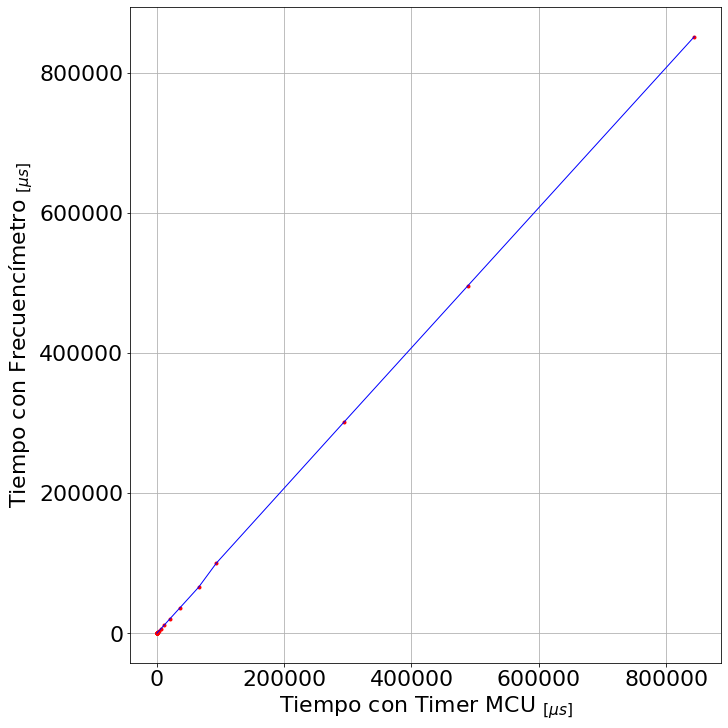

In [11]:
#Fiteo Curva
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 22})

#freq_time = np.array([1,2,3,5,10,19,33,60,107,191,342,614,1101,1975,3540,6352,11352,20385,36552,65525,100157,301692,496085,851305])
freq_time = np.array([100157,301692,496085,851305])
#mcu_time = np.array([1,2,3,5,10,19,33,60,107,191,342,614,1101,1975,3539,6352,11352,20385,36552,65524,93604,294445,488884,844433])
mcu_time = np.array([93604,294445,488884,844433])

# ------------------ Deben usar una recta, esto es un polinomio de grado 6...
#def objective(x, a, b, c, d,e,f,g):
#	return f+(a * x) + (b * x**2) + (c * x**3) + (d * x**4)+(e * x**5)+(g * x**6)
def objective(x, a, b):
	return (a * x) + b

popt, _ = curve_fit(objective, mcu_time, freq_time)

#a, b, c, d,e,f,g = popt

a, b = popt

mcu_time = np.append(mcu_time, 1000000)

#freq_time_fitted = objective(mcu_time, a, b, c, d, e, f, g)



freq_time_fitted = objective(mcu_time, a, b)

freq_time_fitted = (freq_time_fitted+0.5).astype(int)	#redondeo

 

# ploteo fiteo, y transferencia ideal (contemplando Offset y error de ganancia)
fig,ax = plt.subplots(1,1,constrained_layout=True,figsize=(10,10))
ax.plot(mcu_time, freq_time_fitted, color='red',label='Transferencia Real Fitteada')
ax.plot(mcu_time[:-1], freq_time,'.',color='blue',label = 'Transferencia Real')
ax.set_xlabel('Vin')
ax.set_ylabel('Código Out')
ax.grid()
ax.legend()

plt.show()